# **Data Preprocessing and Feature Engineering**

**Vì sự không phù hợp giữa giá trên thẻ HTML và giá trong phần mô tả, chúng ta cần tiến hành phân tích để xác định giá phù hợp nhất cho căn nhà.**

#### **1. Xem xét cột 'Giá theo mét vuông từ mô tả'. (Cột này sẽ có giá trị khi cả hai cột 'Giá từ thẻ HTML' và 'Giá từ mô tả' không có giá)**

In [48]:
# Import data vào và xem thông tin tổng quát
import pandas as pd
df = pd.read_excel("Initial Data.xlsx","Sheet1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mã tin                             10050 non-null  int64  
 1   Địa chỉ                            10050 non-null  object 
 2   Quận/Huyện                         10050 non-null  object 
 3   Tỉnh/Thành phố                     10050 non-null  object 
 4   Kinh độ                            10050 non-null  float64
 5   Vĩ độ                              10050 non-null  float64
 6   Chiều dài                          6933 non-null   float64
 7   Chiều rộng                         7078 non-null   float64
 8   Diện tích                          9706 non-null   float64
 9   Phòng ngủ                          8292 non-null   float64
 10  Phòng WC                           7516 non-null   float64
 11  Phòng khách                        3610 non-null   obj

In [49]:
# Truy cập vào link và xem xét hai data không có giá nhà
df.loc[df['Giá theo mét vuông từ mô tả'].notnull()].values

array([[280747, 'Quận 2, TP Hồ Chí Minh ', 'Quận 2', 'TP Hồ Chí Minh',
        10.7935216, 106.7308195, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, '14/10/2023', 'Thỏa thuận', nan, 1.75,
        'https://batdongsan.vn/cua-go-cong-nghiep-mdf-veneer-tai-quan-2-r280747'],
       [266436, 'Tô Hiến Thành, Quận 10, Thành phố Hồ Chí Minh ',
        'Quận 10', 'TP Hồ Chí Minh', 10.7772543, 106.6646765, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, 2.0, nan, nan, nan, 'Có', nan,
        nan, nan, 'Có', 'Có', 'Có', 'Có', nan, '08/05/2023',
        'Thỏa thuận', nan, 162.0,
        'https://batdongsan.vn/ban-nha-2-tang-duong-lon-2-chieu-co-via-he-to-hien-thanh-quan-10-0902934079-r266436']],
      dtype=object)

In [50]:
# Drop cả data 1 sau khi xem xét. Data 1 không phải là bán nhà.
df = df.drop(index=[4755])

# Xem lại thông tin cột 
df['Giá theo mét vuông từ mô tả'].info()

<class 'pandas.core.series.Series'>
Index: 10049 entries, 0 to 10049
Series name: Giá theo mét vuông từ mô tả
Non-Null Count  Dtype  
--------------  -----  
1 non-null      float64
dtypes: float64(1)
memory usage: 157.0 KB


#### **2. Xử lý giá lấy từ thẻ HTML**

In [51]:
# Xử lý giá từ HTML có nội dung là 'Thỏa thuận' thành None
df['Giá từ thẻ HTML'] = df['Giá từ thẻ HTML'].replace('Thỏa thuận', None)

# Tách cột 'Giá từ thẻ HTML' thành cột 'Giá 1' và 'Đơn vị 1' do cột này có cấu trúc nhất định
df[['Giá 1', 'Đơn vị 1']] = df['Giá từ thẻ HTML'].str.split(' ', n=1, expand=True)

# Xem các giá trị của cột 'Đơn vị 1' vừa tách ra
df['Đơn vị 1'].unique()

array(['triệu', 'tỷ', None, 'nghìn'], dtype=object)

In [52]:
# Đổi kiểu dữ liệu ở 'Giá 1' sang kiểu số
df['Giá 1'] = pd.to_numeric(df['Giá 1'])

# Quy đổi giá sao cho có cùng một đơn vị là tỷ
df.loc[df['Đơn vị 1'] == 'triệu', 'Giá 1'] = df.loc[df['Đơn vị 1'] == 'triệu', 'Giá 1'] / 1000
df.loc[df['Đơn vị 1'] == 'nghìn', 'Giá 1'] = df.loc[df['Đơn vị 1'] == 'nghìn', 'Giá 1'] / 1000000
df['Đơn vị 1'] = df['Đơn vị 1'].replace('triệu', 'tỷ').replace('nghìn', 'tỷ')

# Xem các giá trị của cột 'Đơn vị 1' sau khi quy đổi
df['Đơn vị 1'].unique()

array(['tỷ', None], dtype=object)

In [53]:
# Xem lại thông tin của hai cột vừa xử lý
df[['Giá 1','Đơn vị 1']].info()
# df.to_excel('Data Check 3.xlsx',index=False) 

<class 'pandas.core.frame.DataFrame'>
Index: 10049 entries, 0 to 10049
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Giá 1     9193 non-null   float64
 1   Đơn vị 1  9193 non-null   object 
dtypes: float64(1), object(1)
memory usage: 235.5+ KB


#### **3. Xử lý giá lấy từ mô tả**

In [54]:
# Điều chỉnh giá lấy từ mô tả sao cho chúng có cấu trúc giống nhau nhất có thể
df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.lower()
df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.replace('x', '1')
df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.replace('tỉ','tỷ')

# Thêm cột nhỉnh để cộng thêm 0.1 tỷ vào giá sau khi xử lý
df['Nhỉnh'] = df['Giá từ mô tả'].apply(lambda x: 1 if 'nhỉnh' in x else None)
df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.replace('nhỉnh', '')
df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.replace('íu', '')
df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.replace(',', '.')

df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.rstrip('.').str.rstrip(' ').str.rstrip('tl')
df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.rstrip('.').str.rstrip(' ')
df['Giá từ mô tả'] = df['Giá từ mô tả'].astype(str).str.lstrip(' ')

# Tách cột 'Giá từ mô tả' thành hai cột 'Giá 2' và 'Đơn vị 2' 
df[['Giá 2', 'Đơn vị 2']] = df['Giá từ mô tả'].str.split(' ', n=1, expand=True)

# Xem các giá trị của cột 'Đơn vị 2' 
df['Đơn vị 2'].unique()

array([None, 'tỷ', 'tỷ. 80 tỷ', 'tỷ 1', 'tỷ+', '- 7.5',
       'triệu đồng tương đương với 0.93 tỷ đồng', 'triệu',
       'triệu đồng = 0.545 tỷ', '12 tỷ',
       'tỷ.  chuyển đổi sang đơn vị tỷ đồng: 3.0 tỷ', '4 tỷ', ' tỷ',
       '4 tỷ. chuyển đổi sang đơn vị tỷ đồng: 4.1 tỷ',
       'thỏa thuận (còn thương lượng)', 'lượng', 'triệu/m2'], dtype=object)

In [55]:
# Xem các giá trị của cột 'Giá 2'
df['Giá 2'].unique()

array(['nan', '0.85', '5.5', '0.57', '0.68', '840tr', '0.65', '0.6',
       '1.15', '0.69', '1.55', '0.76', '0.62', '0.55', '5.7', '6.8',
       '2.15', '0.67', '0.7', '1.326', '0.75', '1.484', '2.75', '2.0',
       '2.1', '1.5', '3.75', '3.15', '2.6', '9.0', '0.47', '6.5', '10',
       '2.3', '9.2', '1.6', '55', '2.8', '7.6', '3.7', '1.13', '3.55',
       '1.1', '4.55', '13.5', '5.38', '0.025', '4.85', '6.0', '3.3',
       '4.1', '3.0', '0.012', '16.0', '15.8', '6.4', '12.5', '22', '3.5',
       '4.6', '4.7', '10.5', '4.5', '4.35', '22.5', '11.5', '9.6', '5.2',
       '3.33', '3.1', '5.1', '14.9', '4.8', '6.1', '3.2', '12', '96',
       '7.8', '7.5', '7.9', '4.45', '6.6', '9.1', '0.03', '27', '9.4',
       '17.5', '17.2', '9.8', '4.9', '4.0', '9.9', '3.8', '5.0', '7.3',
       '6.7', '8.2', '16.5', '34', '4.15', '14.3', '9.7', '4', '14.2',
       '16', '7.0', '4.25', '8', '4.68', '2.9', '248.1', '355.2', '11.3',
       '2.7', '15.0', '232.3', '12.7', '3.11', '3.85', '15', '3.25',
    

In [56]:
# Thay thế 'nan' trong cột giá 2 thành None
df['Giá 2'] = df['Giá 2'].replace('nan', None)

In [57]:
# Hàm xử lý các hàng có 'Đơn vị 2' là None
def convertToBilion(row):
    try:
        # Kiểm tra nếu 'Giá 2' không phải là None và có thể chuyển đổi thành số thực
        if row['Giá 2'] is not None and float(row['Giá 2']) and row['Đơn vị 2'] is None:
            return 'tỷ'
    except ValueError:
        pass
    return row['Đơn vị 2']

# Áp dụng hàm để thay đổi giá trị trong cột 'Đơn vị 2'
df['Đơn vị 2'] = df.apply(convertToBilion, axis=1)

In [58]:
# Hàm lấy ra các hàng không có chung cấu trúc
def checkFailRows(row):
    # Kiểm tra nếu 'Giá 2' và 'Đơn vị 2' đều là None hoặc NaN
    if row['Giá 2'] is None and row['Đơn vị 2'] is None:
        return False
    try:
        # Kiểm tra nếu 'Giá 2' có thể chuyển đổi thành số thập phân
        if float(row['Giá 2']) and row['Đơn vị 2'] in ['tỷ', 'triệu']:
            return False
    except ValueError:
        return True
    return True

# Áp dụng hàm để lấy ra các hàng không có chung cấu trúc
df_filtered = df[df.apply(checkFailRows, axis=1)].copy()

# Xem số lượng hàng là bao nhiêu
print(len(df_filtered))

# Tạo thêm cột Index 
df_filtered['Index']=df_filtered.index

# Xem thông tin của các hàng
df_filtered[['Index','Giá từ thẻ HTML', 'Giá từ mô tả', 'Url']].values.tolist()

32


[[8,
  '840000 tỷ',
  '840tr',
  'https://batdongsan.vn/ve-que-song-ban-nha-840tr-1-lau-cau-ba-lat-binh-chanh-2-phong-ngu-shr-r275241'],
 [111,
  '80 tỷ',
  '96 tỷ. 80 tỷ',
  'https://batdongsan.vn/ban-kho-duong-ho-van-long-tan-tao-dt-4400m2-r284055'],
 [132,
  '2.7 tỷ',
  '2.1 tỷ 1',
  'https://batdongsan.vn/anh-hai-gui-e-ban-can-nha-2-tang-60m2-sat-mat-tien-quan-binh-tan-chi-2x-ty-xiu-r283537'],
 [134,
  '2700 tỷ',
  '2.1 tỷ 1',
  'https://batdongsan.vn/anh-hai-gui-e-ban-can-nha-2-tang-60m2-sat-mat-tien-quan-binh-tan-chi-2x-ty-xiu-r283470'],
 [214,
  '5.9 tỷ',
  '5.1 tỷ+',
  'https://batdongsan.vn/nha-hxh-khu-vip-huong-lo-2-ngang-5m-80m2-4-tang-btct-nhinh-5-ty-r281300'],
 [592,
  '3 tỷ',
  '3.????tỏi',
  'https://batdongsan.vn/nha-dep-binh-tan-vao-o-ngay-gia-chi-3-ty-vi-tri-r274613'],
 [719,
  '7400000000 tỷ',
  '7.4 - 7.5',
  'https://batdongsan.vn/ban-nha-huong-lo-2-binh-tan-hxh-66m2-5-tang-btct-dep-lung-linh-chi-nhinh-7-ty-tl-r269509'],
 [849,
  '930 tỷ',
  '930 triệu đồng tương đ

In [59]:
# Truy cập vào từng link vào thực hiện sửa thủ công tạo danh sách giá sửa theo thứ tự
cost_repair = [0.84, 80, 2.1, 2.1, 5.2, 3.1, 7.45, 0.93, 4.8, 4.45, 4.9, 4.4, 10.3, 0.535, 0.545, 12, 3, 3.8, 0.75, 4, 4.1, 7, 4, 5.1, 5.1, 6, 4.1, 2.29, 33.6, 39, 22.75, 5.25]

# Tạo danh sách index theo thứ tự giá
index_cost_repair = df_filtered['Index'].tolist()

In [60]:
# Sửa 'Giá 2' và 'Đơn vị 2' trong df gốc
for index, value in zip(index_cost_repair, cost_repair):
    # Gán giá trị cho cột 'Giá 2' tại chỉ mục index
    df.loc[index, 'Giá 2'] = value
    # Chỉnh đơn vị 2 thành 'tỷ'
    df.loc[index, 'Đơn vị 2'] = 'tỷ'

# Xem các giá trị của cột 'Đơn vị 2'
df['Đơn vị 2'].unique()

array([None, 'tỷ', 'triệu'], dtype=object)

In [61]:
# Quy đổi giá về chung một đơn vị là tỷ
df['Giá 2'] = pd.to_numeric(df['Giá 2'])
df.loc[df['Đơn vị 2'] == 'triệu', 'Giá 2'] = df.loc[df['Đơn vị 2'] == 'triệu', 'Giá 2'] / 1000
df['Đơn vị 2'] = df['Đơn vị 2'].replace('triệu', 'tỷ')

# Xem các giá trị của cột 'Đơn vị 2' sau khi thực hiện quy đổi
df['Đơn vị 2'].unique()

array([None, 'tỷ'], dtype=object)

In [62]:
# Xem thông tin của hai cột vừa xử lý
df[['Giá 2','Đơn vị 2']].info()
# df.to_excel('Data Check 3.xlsx',index=False) 

<class 'pandas.core.frame.DataFrame'>
Index: 10049 entries, 0 to 10049
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Giá 2     9307 non-null   float64
 1   Đơn vị 2  9307 non-null   object 
dtypes: float64(1), object(1)
memory usage: 493.6+ KB


#### **4. Lấy ra giá phù hợp**

In [63]:
# Hàm áp dụng cho việc tạo cột mới 'Giá'
def select_price(row):
    # Trả về None nếu cả 'Giá 1' và 'Giá 2' đều là None
    if pd.isnull(row['Giá 1']) and pd.isnull(row['Giá 2']):
        return None
    
    # Trả về giá từ 'Giá 2' nếu 'Giá 1' là None
    if pd.isnull(row['Giá 1']):
        return row['Giá 2']
    
    # Trả về giá từ 'Giá 1' nếu 'Giá 2' là None
    if pd.isnull(row['Giá 2']):
        return row['Giá 1']
    
    # Trả về giá nhỏ nhất giữa 'Giá 1' và 'Giá 2'
    return min(row['Giá 1'], row['Giá 2'])


# Tạo cột mới 'Giá' sử dụng hàm áp dụng
df['Giá'] = df.apply(lambda row: select_price(row), axis=1)

In [64]:
# Kiểm tra thông tin cột 'Giá'
df['Giá'].info()
# df.to_excel('Data Check 4.1.xlsx',index=False) 

<class 'pandas.core.series.Series'>
Index: 10049 entries, 0 to 10049
Series name: Giá
Non-Null Count  Dtype  
--------------  -----  
9914 non-null   float64
dtypes: float64(1)
memory usage: 415.1 KB


In [65]:
rows_with_none_price = df[df['Giá'].isna()]
# rows_with_none_price.to_excel('Data Check 4.2.xlsx',index=False) 

#### **5. Drop các cột, hàng không cần thiết**

In [66]:
# Xem lại thông tin của data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10049 entries, 0 to 10049
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mã tin                             10049 non-null  int64  
 1   Địa chỉ                            10049 non-null  object 
 2   Quận/Huyện                         10049 non-null  object 
 3   Tỉnh/Thành phố                     10049 non-null  object 
 4   Kinh độ                            10049 non-null  float64
 5   Vĩ độ                              10049 non-null  float64
 6   Chiều dài                          6933 non-null   float64
 7   Chiều rộng                         7078 non-null   float64
 8   Diện tích                          9706 non-null   float64
 9   Phòng ngủ                          8292 non-null   float64
 10  Phòng WC                           7516 non-null   float64
 11  Phòng khách                        3610 non-null   object 


In [67]:
# Lấy ra các cột có tỷ lệ non-null lớn hơn bằng 30% 
# <=> Loại các cột có tỷ lệ null lớn hơn bằng 70% 
df_dropped = df[[column for column in df if df[column].count() / len(df) >= 0.3]].copy() 

# Tiếp tục loại các cột không cần thiết
df_dropped = df_dropped.drop(['Mã tin', 'Tỉnh/Thành phố', 'Url', 'Địa chỉ', 'Giá từ thẻ HTML', 'Giá từ mô tả', 'Giá 1', 'Giá 2', 'Đơn vị 1', 'Đơn vị 2'], axis=1)

# In ra danh sách cột đã được loại
print("List of dropped columns:")
for column in df.columns:
    if column not in df_dropped.columns:
        print(' + ',column)

List of dropped columns:
 +  Mã tin
 +  Địa chỉ
 +  Tỉnh/Thành phố
 +  Sân vườn/Sân trước/Sân sau
 +  Hướng nhà
 +  Hướng ban công
 +  Cấp
 +  Gần bệnh viện
 +  Hoàn công đủ
 +  Giá từ thẻ HTML
 +  Giá từ mô tả
 +  Giá theo mét vuông từ mô tả
 +  Url
 +  Giá 1
 +  Đơn vị 1
 +  Nhỉnh
 +  Giá 2
 +  Đơn vị 2


In [68]:
# Drop các hàng giống nhau
df = df_dropped.drop_duplicates().copy()

# Tính tỷ lệ giá trị null cho mỗi hàng
null_ratios = df.isnull().mean(axis=1)

# Lọc các hàng có tỷ lệ null nhỏ hơn hoặc bằng ngưỡng 0.5
df = df[null_ratios <= 0.5]

In [69]:
# df.to_excel('Data Check 5.xlsx',index=False) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8810 entries, 2 to 10049
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Quận/Huyện                         8810 non-null   object 
 1   Kinh độ                            8810 non-null   float64
 2   Vĩ độ                              8810 non-null   float64
 3   Chiều dài                          6341 non-null   float64
 4   Chiều rộng                         6483 non-null   float64
 5   Diện tích                          8644 non-null   float64
 6   Phòng ngủ                          7756 non-null   float64
 7   Phòng WC                           7103 non-null   float64
 8   Phòng khách                        3495 non-null   object 
 9   Nhà bếp                            3426 non-null   object 
 10  Sân thượng/Ban công                3962 non-null   object 
 11  Tầng                               8047 non-null   float64
 

#### **6. Thống nhất giá trị trong các cột, xử lý giá trị null lần 1**

In [70]:
# Xem giá trị của các cột 
for column in ['Phòng khách', 'Nhà bếp', 'Sân thượng/Ban công', 'Nhà mặt tiền', 'Gần trường học', 'Gần chợ', 'Gần siêu thị/trung tâm thương mại', 'Sổ hồng', 'Chính chủ', 'Pháp lý chuẩn']:  
    unique_values = df[column].unique()
    print(f"Các giá trị duy nhất trong cột '{column}': {unique_values}")

Các giá trị duy nhất trong cột 'Phòng khách': [nan 'Có' 2 1]
Các giá trị duy nhất trong cột 'Nhà bếp': [nan 'Có' 2 1]
Các giá trị duy nhất trong cột 'Sân thượng/Ban công': ['Có' nan]
Các giá trị duy nhất trong cột 'Nhà mặt tiền': [nan 'Có']
Các giá trị duy nhất trong cột 'Gần trường học': [nan 'Có']
Các giá trị duy nhất trong cột 'Gần chợ': [nan 'Có']
Các giá trị duy nhất trong cột 'Gần siêu thị/trung tâm thương mại': [nan 'Có']
Các giá trị duy nhất trong cột 'Sổ hồng': ['Có' nan]
Các giá trị duy nhất trong cột 'Chính chủ': ['Có' nan]
Các giá trị duy nhất trong cột 'Pháp lý chuẩn': [nan 'Có']


In [71]:
# Thực hiện việc thống nhất giá trị trong các cột và fill None thành 0
df['Phòng khách'] = df['Phòng khách'].replace(2, 1).replace('Có', 1).fillna(0)
df['Nhà bếp'] = df['Nhà bếp'].replace(2, 1).replace('Có', 1).fillna(0)
df['Sân thượng/Ban công'] = df['Sân thượng/Ban công'].replace('Có', 1).fillna(0)
df['Nhà mặt tiền'] = df['Nhà mặt tiền'].replace('Có', 1).fillna(0)
df['Gần trường học'] = df['Gần trường học'].replace('Có', 1).fillna(0)
df['Gần chợ'] = df['Gần chợ'].replace('Có', 1).fillna(0)
df['Gần siêu thị/trung tâm thương mại'] = df['Gần siêu thị/trung tâm thương mại'].replace('Có', 1).fillna(0)
df['Sổ hồng'] = df['Sổ hồng'].replace('Có', 1).fillna(0)
df['Chính chủ'] = df['Chính chủ'].replace('Có', 1).fillna(0)
df['Pháp lý chuẩn'] = df['Pháp lý chuẩn'].replace('Có', 1).fillna(0)

# Kiểm tra lại giá trị các cột vừa được xử lý
for column in ['Phòng khách', 'Nhà bếp', 'Sân thượng/Ban công', 'Nhà mặt tiền', 'Gần trường học', 'Gần chợ', 'Gần siêu thị/trung tâm thương mại', 'Sổ hồng', 'Chính chủ', 'Pháp lý chuẩn']:  
    unique_values = df[column].unique()
    print(f"Các giá trị duy nhất trong cột '{column}': {unique_values}")

Các giá trị duy nhất trong cột 'Phòng khách': [0. 1.]
Các giá trị duy nhất trong cột 'Nhà bếp': [0. 1.]
Các giá trị duy nhất trong cột 'Sân thượng/Ban công': [1. 0.]
Các giá trị duy nhất trong cột 'Nhà mặt tiền': [0. 1.]
Các giá trị duy nhất trong cột 'Gần trường học': [0. 1.]
Các giá trị duy nhất trong cột 'Gần chợ': [0. 1.]
Các giá trị duy nhất trong cột 'Gần siêu thị/trung tâm thương mại': [0. 1.]
Các giá trị duy nhất trong cột 'Sổ hồng': [1. 0.]
Các giá trị duy nhất trong cột 'Chính chủ': [1. 0.]
Các giá trị duy nhất trong cột 'Pháp lý chuẩn': [0. 1.]


In [72]:
# Fill null value cho cột 'Diện tích'
# Xem số hàng không có diện tích
print(df['Diện tích'].isna().sum())

# Điều kiện để xác định những hàng cần tính diện tích
condition = df['Diện tích'].isna() & df['Chiều dài'].notna() & df['Chiều rộng'].notna()

# Tính toán và gán lại giá trị cho cột 'Diện tích'
df.loc[condition, 'Diện tích'] = df['Chiều dài'] * df['Chiều rộng']

# Xem lại số hàng không có diện tích
df['Diện tích'].isna().sum()

166


59

In [73]:
# Tương tự fill null value cho cột 'Chiều dài'
print(df['Chiều dài'].isna().sum())
condition = df['Diện tích'].notna() & df['Chiều dài'].isna() & df['Chiều rộng'].notna()
df.loc[condition, 'Chiều dài'] = df['Diện tích'] / df['Chiều rộng']
df['Chiều dài'].isna().sum()

2469


2193

In [74]:
# Tương tự fill null value cho cột 'Chiều rộng'
print(df['Chiều rộng'].isna().sum())
condition = df['Diện tích'].notna() & df['Chiều dài'].notna() & df['Chiều rộng'].isna()
df.loc[condition, 'Chiều rộng'] = df['Diện tích'] / df['Chiều dài']
df['Chiều rộng'].isna().sum()

2327


2193

In [75]:
# Thực hiện hoán đổi nếu chiều dài bé hơn chiều rộng
# Lấy các chỉ số mà chiều dài nhỏ hơn chiều rộng
swap_indices = df['Chiều dài'] < df['Chiều rộng']

# Đổi chỗ giá trị tại các chỉ số đó
df.loc[swap_indices, ['Chiều dài', 'Chiều rộng']] = df.loc[
        swap_indices, ['Chiều rộng', 'Chiều dài']].values


#### **7. Tạo các thuộc tính mới**

In [76]:
df['Điểm tiện nghi trong nhà'] = df['Phòng khách'] + df['Nhà bếp'] + df['Sân thượng/Ban công']
df['Điểm tiện ích vị trí'] = df['Nhà mặt tiền'] + df['Gần trường học'] + df['Gần chợ'] + df['Gần siêu thị/trung tâm thương mại']
df['Điểm pháp lý'] = df['Sổ hồng'] + df['Chính chủ'] + df['Pháp lý chuẩn']

#### **8. Xử lý các outlier**

In [77]:
# Xem lại thông tin tổng quát của data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8810 entries, 2 to 10049
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Quận/Huyện                         8810 non-null   object 
 1   Kinh độ                            8810 non-null   float64
 2   Vĩ độ                              8810 non-null   float64
 3   Chiều dài                          6617 non-null   float64
 4   Chiều rộng                         6617 non-null   float64
 5   Diện tích                          8751 non-null   float64
 6   Phòng ngủ                          7756 non-null   float64
 7   Phòng WC                           7103 non-null   float64
 8   Phòng khách                        8810 non-null   float64
 9   Nhà bếp                            8810 non-null   float64
 10  Sân thượng/Ban công                8810 non-null   float64
 11  Tầng                               8047 non-null   float64
 

array([[<Axes: title={'center': 'Chiều dài'}>,
        <Axes: title={'center': 'Diện tích'}>,
        <Axes: title={'center': 'Phòng ngủ'}>],
       [<Axes: title={'center': 'Phòng WC'}>,
        <Axes: title={'center': 'Tầng'}>,
        <Axes: title={'center': 'Giá'}>]], dtype=object)

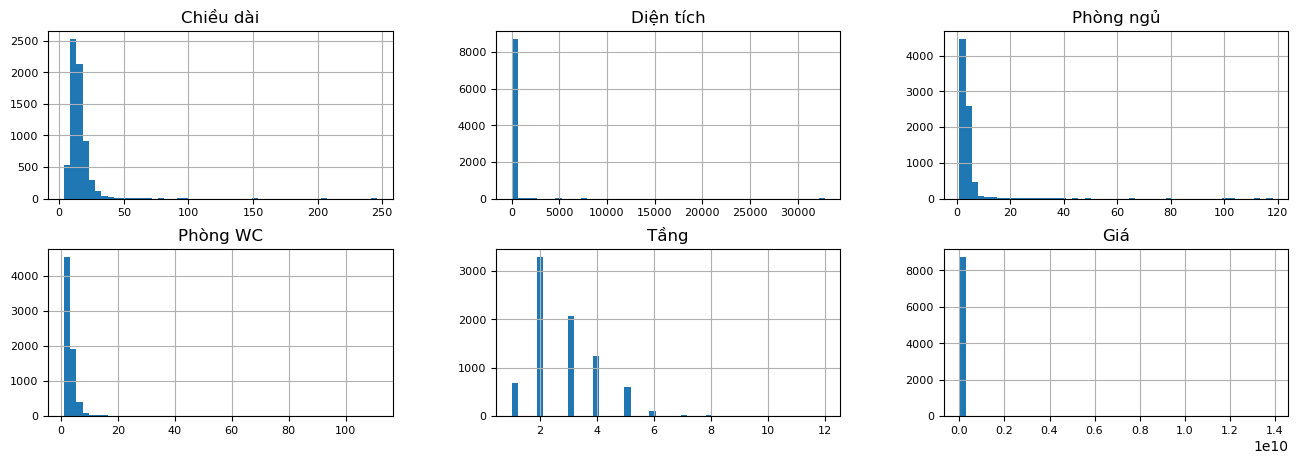

In [78]:
# Do chiều dài chiều rộng, và diện tích có mối quan hệ với nhau nên chỉ xử lý outlier 2 trong 3 
df[['Chiều dài', 'Diện tích', 'Phòng ngủ', 'Phòng WC', 'Tầng', 'Giá']].hist(figsize=(16, 5), bins=50, xlabelsize=8, ylabelsize=8, layout=(2, 3))

In [79]:
# Xử lý các giá trị quá lớn hoặc quá nhỏ do nhập sai. Sau đó thay thế outlier của các thuộc tính bằng ngưỡng trên và ngưỡng dưới của boxplot.

In [80]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['Giá'].quantile(0.25)
Q3 = df['Giá'].quantile(0.75)
IQR = Q3 - Q1

# Tính ngưỡng trên và ngưỡng dưới
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Xác định outlier
outliers = df[(df['Giá'] < lower_limit) | (df['Giá'] > upper_limit)]

# Tính tỷ lệ outlier
outlier_ratio = len(outliers) / len(df)
print('Ngưỡng trên: ',upper_limit)
print('Ngưỡng dưới: ',lower_limit)
print('Số outlier: ',len(outliers))
print('Tỷ lệ outlier: ',outlier_ratio)

# Xử lý các giá trị quá lớn hoặc quá nhỏ do nhập sai.
df.loc[df['Giá'] < 0.3, 'Giá'] = df['Giá'] * df['Diện tích']
df = df.drop(8717)
df.loc[df['Giá'] < 0.1, 'Giá'] = df['Giá'] * 1e2
df.loc[df['Giá'] < 0.3, 'Giá'] = df['Giá'] * 1e1
df.loc[df['Giá'] > 1e9, 'Giá'] = df['Giá'] / 1e9
df.loc[df['Giá'] > 1e6, 'Giá'] = df['Giá'] / 1e6
df.loc[df['Giá'] > 1e3, 'Giá'] = df['Giá'] / 1e3
df.loc[df['Giá'] > 150, 'Giá'] = df['Giá'] / 1e2

# Check lại giá xem hợp lý chưa
print(df['Giá'].sort_values(ascending=False).head(50))
df['Giá'].min()

# Thay thế outlier của các thuộc tính bằng ngưỡng trên và ngưỡng dưới của boxplot.
df['Giá'] = df['Giá'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

Ngưỡng trên:  14.574999999999998
Ngưỡng dưới:  -2.424999999999998
Số outlier:  808
Tỷ lệ outlier:  0.09171396140749148
5105    150.000
5104    150.000
5536    150.000
9182    148.000
6149    145.000
4876    140.000
1924    139.000
1718    135.000
2767    135.000
6135    135.000
8824    132.000
9193    130.000
5455    126.000
4953    115.000
9086    105.000
9920    101.111
9242     99.000
1062     98.000
4836     98.000
618      96.000
9135     90.000
9092     90.000
9090     90.000
9180     90.000
2229     86.000
9151     85.000
1341     85.000
9149     85.000
9150     85.000
4404     82.000
2813     82.000
5457     80.000
6067     80.000
6525     79.000
9110     77.000
5968     76.000
9179     75.000
9120     75.000
4871     75.000
4916     75.000
5082     75.000
1798     73.000
9188     72.000
1567     70.000
9666     70.000
9085     70.000
4923     70.000
9121     69.500
6858     68.000
7259     67.000
Name: Giá, dtype: float64


In [81]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['Chiều dài'].quantile(0.25)
Q3 = df['Chiều dài'].quantile(0.75)
IQR = Q3 - Q1

# Tính ngưỡng trên và ngưỡng dưới
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Xác định outlier
outliers = df[(df['Chiều dài'] < lower_limit) | (df['Chiều dài'] > upper_limit)]

# Tính tỷ lệ outlier
outlier_ratio = len(outliers) / len(df)
print('Ngưỡng trên: ',upper_limit)
print('Ngưỡng dưới: ',lower_limit)
print('Số outlier: ',len(outliers))
print('Tỷ lệ outlier: ',outlier_ratio)

# Do tỷ lệ outlier nhỏ nên thay thế các outlier bằng ngưỡng trên và dưới luôn
df['Chiều dài'] = df['Chiều dài'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
df.loc[df['Chiều dài'] < 5, 'Chiều dài'] = 5

# Check lại xem hợp lý chưa
df['Chiều dài'].min()

Ngưỡng trên:  28.5
Ngưỡng dưới:  0.5
Số outlier:  185
Tỷ lệ outlier:  0.021001248722897038


5.0

In [82]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['Diện tích'].quantile(0.25)
Q3 = df['Diện tích'].quantile(0.75)
IQR = Q3 - Q1

# Tính ngưỡng trên và ngưỡng dưới
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Xác định outlier
outliers = df[(df['Diện tích'] < lower_limit) | (df['Diện tích'] > upper_limit)]

# Tính tỷ lệ outlier
outlier_ratio = len(outliers) / len(df)
print('Ngưỡng trên: ',upper_limit)
print('Ngưỡng dưới: ',lower_limit)
print('Số outlier: ',len(outliers))
print('Tỷ lệ outlier: ',outlier_ratio)

# Xử lý các giá trị quá lớn hoặc quá nhỏ do nhập sai.
# Diện tích max bằng chiều dài ngưỡng trên max bình phương bằng 812.25
df.loc[df['Diện tích'] > 1e4, 'Diện tích'] = df['Diện tích'] / 1e2
df.loc[df['Diện tích'] > 812.25, 'Diện tích'] = df['Diện tích'] / 1e1
df.loc[df['Diện tích'] < 25, 'Diện tích'] = 25
print(df['Diện tích'].sort_values(ascending=False).head(20))

# Check lại xem hợp lý chưa
df['Diện tích'].min()

# Thay thế outlier của các thuộc tính bằng ngưỡng trên và ngưỡng dưới của boxplot.
df['Diện tích'] = df['Diện tích'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

Ngưỡng trên:  132.5
Ngưỡng dưới:  -7.5
Số outlier:  669
Tỷ lệ outlier:  0.07594505619253036
3345    800.0
5536    800.0
1062    798.0
1014    777.0
582     742.0
5968    715.0
991     700.0
5082    620.0
5972    617.0
9787    590.0
5762    570.0
5445    558.0
6525    537.0
6122    525.0
1758    521.0
6829    517.0
7914    512.0
3269    510.0
5105    507.0
5104    507.0
Name: Diện tích, dtype: float64


In [83]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['Tầng'].quantile(0.25)
Q3 = df['Tầng'].quantile(0.75)
IQR = Q3 - Q1

# Tính ngưỡng trên và ngưỡng dưới
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Xác định outlier
outliers = df[(df['Tầng'] < lower_limit) | (df['Tầng'] > upper_limit)]

# Tính tỷ lệ outlier
outlier_ratio = len(outliers) / len(df)
print('Ngưỡng trên: ',upper_limit)
print('Ngưỡng dưới: ',lower_limit)
print('Số outlier: ',len(outliers))
print('Tỷ lệ outlier: ',outlier_ratio)

# Thay thế outlier của các thuộc tính bằng ngưỡng trên và ngưỡng dưới của boxplot.
df['Tầng'] = df['Tầng'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

# Check lại xem hợp lý chưa
df['Tầng'].sort_values(ascending=False).head(20)
df['Tầng'].min()

Ngưỡng trên:  4.5
Ngưỡng dưới:  0.5
Số outlier:  752
Tỷ lệ outlier:  0.08536723805199228


1.0

In [84]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['Phòng WC'].quantile(0.25)
Q3 = df['Phòng WC'].quantile(0.75)
IQR = Q3 - Q1

# Tính ngưỡng trên và ngưỡng dưới
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Xác định outlier
outliers = df[(df['Phòng WC'] < lower_limit) | (df['Phòng WC'] > upper_limit)]

# Tính tỷ lệ outlier
outlier_ratio = len(outliers) / len(df)
print('Ngưỡng trên: ',upper_limit)
print('Ngưỡng dưới: ',lower_limit)
print('Số outlier: ',len(outliers))
print('Tỷ lệ outlier: ',outlier_ratio)

# Thay thế các outlier bằng ngưỡng trên và dưới
df['Phòng WC'] = df['Phòng WC'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

# Check lại xem hợp lý chưa
df['Phòng WC'].min()

Ngưỡng trên:  7.0
Ngưỡng dưới:  -1.0
Số outlier:  220
Tỷ lệ outlier:  0.024974457940742423


1.0

In [85]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['Phòng ngủ'].quantile(0.25)
Q3 = df['Phòng ngủ'].quantile(0.75)
IQR = Q3 - Q1

# Tính ngưỡng trên và ngưỡng dưới
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Xác định outlier
outliers = df[(df['Phòng ngủ'] < lower_limit) | (df['Phòng ngủ'] > upper_limit)]

# Tính tỷ lệ outlier
outlier_ratio = len(outliers) / len(df)
print('Ngưỡng trên: ',upper_limit)
print('Ngưỡng dưới: ',lower_limit)
print('Số outlier: ',len(outliers))
print('Tỷ lệ outlier: ',outlier_ratio)

# Thay thế các outlier bằng ngưỡng trên và dưới
df['Phòng ngủ'] = df['Phòng ngủ'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

# Check lại xem hợp lý chưa
df['Phòng ngủ'].min()

Ngưỡng trên:  7.0
Ngưỡng dưới:  -1.0
Số outlier:  298
Tỷ lệ outlier:  0.03382903848336928


1.0

In [86]:
# Xử lý outlier của 'Kinh độ' và 'Vĩ độ'
coordinate = pd.read_excel("Initial Data.xlsx","Sheet2")
df['Kinh độ'] = df['Kinh độ'].apply(lambda x: coordinate['Kinh độ'].max() if x > coordinate['Kinh độ'].max() else (coordinate['Kinh độ'].min() if x < coordinate['Kinh độ'].min() else x))
df['Vĩ độ'] = df['Vĩ độ'].apply(lambda x: coordinate['Vĩ độ'].max() if x > coordinate['Vĩ độ'].max() else (coordinate['Vĩ độ'].min() if x < coordinate['Vĩ độ'].min() else x))

array([[<Axes: title={'center': 'Chiều dài'}>,
        <Axes: title={'center': 'Diện tích'}>,
        <Axes: title={'center': 'Phòng ngủ'}>],
       [<Axes: title={'center': 'Phòng WC'}>,
        <Axes: title={'center': 'Tầng'}>,
        <Axes: title={'center': 'Giá'}>]], dtype=object)

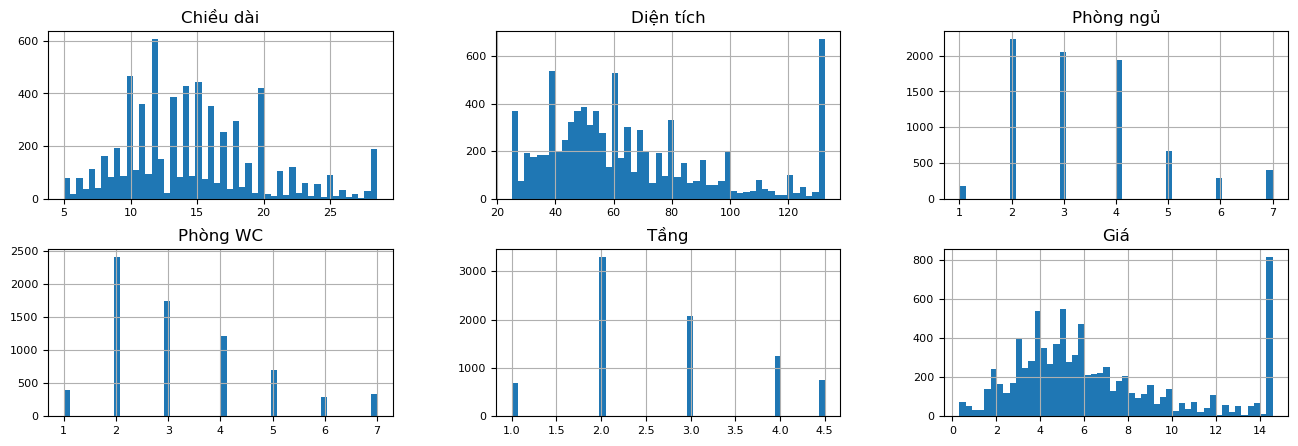

In [87]:
df[['Chiều dài',  'Diện tích', 'Phòng ngủ', 'Phòng WC', 'Tầng', 'Giá']].hist(figsize=(16, 5), bins=50, xlabelsize=8, ylabelsize=8, layout=(2, 3))

**Giải Thích và Sự Đánh Đổi của Việc Điều Chỉnh Outlier về Ngưỡng**

**Giải Thích**

1. **Điều Chỉnh Outlier về Ngưỡng**:
   - **Xác định ngưỡng**: Sử dụng Interquartile Range (IQR) để tính toán ngưỡng trên và ngưỡng dưới, từ đó xác định các giá trị ngoại lệ.
   - **Điều chỉnh**: Đưa các giá trị vượt quá ngưỡng trên về giá trị ngưỡng trên, và các giá trị dưới ngưỡng dưới về giá trị ngưỡng dưới.

2. **Tác Động Đến Phân Phối Dữ Liệu**:
   - **Giảm ảnh hưởng của outlier**: Giúp mô hình ít bị ảnh hưởng bởi các giá trị cực đoan, đặc biệt là các mô hình như hồi quy tuyến tính.
   - **Thay đổi phân phối**: Phân phối dữ liệu sẽ có phần đuôi dày hơn do nhiều giá trị được điều chỉnh về cùng một ngưỡng.

**Sự Đánh Đổi**

1. **Lợi Ích**:
   - **Tăng độ ổn định của mô hình**: Mô hình sẽ ổn định hơn và tránh hiện tượng overfitting do các giá trị cực đoan.
   - **Cải thiện độ chính xác trong phạm vi thông thường**: Dự đoán chính xác hơn cho các giá trị nằm trong phạm vi thông thường của dữ liệu.

2. **Hạn Chế**:
   - **Mất thông tin từ outlier**: Các outlier có thể chứa thông tin quan trọng, đặc biệt trong các lĩnh vực như tài chính hay y tế. Điều chỉnh chúng có thể dẫn đến mất mát thông tin này.
   - **Đuôi phân phối dày hơn**: Làm cho mô hình khó dự đoán chính xác các giá trị gần ngưỡng do nhiều giá trị được điều chỉnh về cùng một điểm.
   - **Lệch dữ liệu**: Điều chỉnh các outlier có thể làm lệch dữ liệu và mô hình, đặc biệt nếu các outlier phản ánh các xu hướng thực tế hoặc điều kiện cực đoan.

#### **9. Mã hóa Quận/Huyện bằng phương pháp Smoothing trong Target Encoding - Mean Encoding**

In [88]:
# Tính giá trị trung bình của biến mục tiêu trên toàn bộ tập dữ liệu
overall_mean = df['Giá'].mean()

# Tính giá trị trung bình của biến mục tiêu cho mỗi danh mục
category_means = df.groupby('Quận/Huyện')['Giá'].mean()

# Tính số lần xuất hiện của mỗi danh mục
category_counts = df.groupby('Quận/Huyện').size()

# Chọn giá trị m (smoothing factor)
m = 2.0

# Tính weight cho mỗi danh mục
weights = category_counts / (category_counts + m)

# Tính giá trị encoding
smooth_encoded_values = weights * category_means + (1 - weights) * overall_mean

# Tạo dictionary từ kết quả
target_encoding_dict = smooth_encoded_values.to_dict()

# Áp dụng target encoding lên DataFrame
df['Mã Quận/Huyện'] = df['Quận/Huyện'].map(target_encoding_dict)
district_df = pd.DataFrame(list(target_encoding_dict.items()), columns=['Quận/Huyện', 'Mã Quận/Huyện'])
district_df

,Quận/Huyện,Mã Quận/Huyện
0,Bình Chánh,2.805726
1,Bình Thạnh,7.034929
2,Bình Tân,5.642839
3,Cần Giờ,4.938335
4,Củ Chi,1.890177
5,Gò Vấp,6.134836
6,Hóc Môn,2.645462
7,Nhà Bè,6.821250
8,Phú Nhuận,7.312405
9,Quận 1,11.390827


#### **10. Xử lý giá trị null lần 2**

In [89]:
# Xem thông tin của data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8809 entries, 2 to 10049
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Quận/Huyện                         8809 non-null   object 
 1   Kinh độ                            8809 non-null   float64
 2   Vĩ độ                              8809 non-null   float64
 3   Chiều dài                          6616 non-null   float64
 4   Chiều rộng                         6616 non-null   float64
 5   Diện tích                          8750 non-null   float64
 6   Phòng ngủ                          7755 non-null   float64
 7   Phòng WC                           7102 non-null   float64
 8   Phòng khách                        8809 non-null   float64
 9   Nhà bếp                            8809 non-null   float64
 10  Sân thượng/Ban công                8809 non-null   float64
 11  Tầng                               8046 non-null   float64
 

**MICE (Multiple Imputation by Chained Equations)** là một phương pháp điền giá trị bị thiếu trong dữ liệu bằng cách sử dụng mô hình dự đoán. MICE giúp bảo toàn sự biến đổi và mối quan hệ giữa các biến trong dữ liệu, tránh tạo ra các thiên lệch so với phương pháp đơn giản như điền trung bình. Phương pháp này có thể xử lý nhiều kiểu dữ liệu và phân phối khác nhau. Quá trình thực hiện MICE bao gồm:

1. **Khởi tạo giá trị thiếu**: Giá trị ban đầu cho các mục bị thiếu được điền tạm thời (có thể bằng giá trị trung bình, median hoặc một giá trị ngẫu nhiên).
2. **Xây dựng mô hình dự đoán**: Đối với mỗi biến có giá trị thiếu, một mô hình dự đoán được xây dựng dựa trên các biến còn lại. Giá trị bị thiếu của biến này được dự đoán bằng mô hình này.
3. **Lặp lại quá trình**: Quá trình này được lặp lại nhiều lần cho đến khi hội tụ, nghĩa là các giá trị bị thiếu không còn thay đổi đáng kể.

Nhóm quyết định sử dụng phương pháp MICE để điền giá trị null nhằm bảo toàn mối quan hệ và sự biến đổi của các biến trong dữ liệu, giúp mô hình dự đoán chính xác và ổn định hơn.

In [90]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# MICE Imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
columns_to_drop = ['Ngày đăng', 'Chiều rộng', 'Quận/Huyện']

# Tạo bản sao của df để tránh thay đổi dữ liệu gốc
df_copy = df.copy()

# Thực hiện imputation trên bản sao
df_mice = imputer.fit_transform(df_copy.drop(columns = columns_to_drop))

# Chuyển đổi lại thành DataFrame và đặt lại index
df_mice = pd.DataFrame(df_mice, columns=df_copy.drop(columns=columns_to_drop).columns).reset_index(drop=True)

# Nối lại với các cột không có giá trị thiếu (cũng đặt lại index)
df_mice = pd.concat([df[columns_to_drop].reset_index(drop=True), df_mice], axis=1)

# Gán lại vào biến gốc
df = df_mice.copy()

# Xem thông tin của data sau khi xử lý
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ngày đăng                          8809 non-null   object 
 1   Chiều rộng                         6616 non-null   float64
 2   Quận/Huyện                         8809 non-null   object 
 3   Kinh độ                            8809 non-null   float64
 4   Vĩ độ                              8809 non-null   float64
 5   Chiều dài                          8809 non-null   float64
 6   Diện tích                          8809 non-null   float64
 7   Phòng ngủ                          8809 non-null   float64
 8   Phòng WC                           8809 non-null   float64
 9   Phòng khách                        8809 non-null   float64
 10  Nhà bếp                            8809 non-null   float64
 11  Sân thượng/Ban công                8809 non-null   float

In [91]:
# Xử lý cột 'Chiều rộng'
df['Chiều rộng'] = df['Diện tích'] / df['Chiều dài']

# Các cột cần làm tròn về số nguyên
integer_columns = ['Phòng ngủ', 'Phòng WC', 'Tầng', 'Phòng khách', 'Nhà bếp', 'Sân thượng/Ban công', 'Tầng', 'Nhà mặt tiền', 'Gần trường học', 'Gần chợ', 'Gần siêu thị/trung tâm thương mại', 'Sổ hồng', 'Chính chủ', 'Pháp lý chuẩn', 'Điểm tiện nghi trong nhà', 'Điểm tiện ích vị trí', 'Điểm pháp lý']  

# Làm tròn các giá trị trong các cột này
for col in integer_columns:
    df[col] = df[col].round().astype('Int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ngày đăng                          8809 non-null   object 
 1   Chiều rộng                         8809 non-null   float64
 2   Quận/Huyện                         8809 non-null   object 
 3   Kinh độ                            8809 non-null   float64
 4   Vĩ độ                              8809 non-null   float64
 5   Chiều dài                          8809 non-null   float64
 6   Diện tích                          8809 non-null   float64
 7   Phòng ngủ                          8809 non-null   Int64  
 8   Phòng WC                           8809 non-null   Int64  
 9   Phòng khách                        8809 non-null   Int64  
 10  Nhà bếp                            8809 non-null   Int64  
 11  Sân thượng/Ban công                8809 non-null   Int64

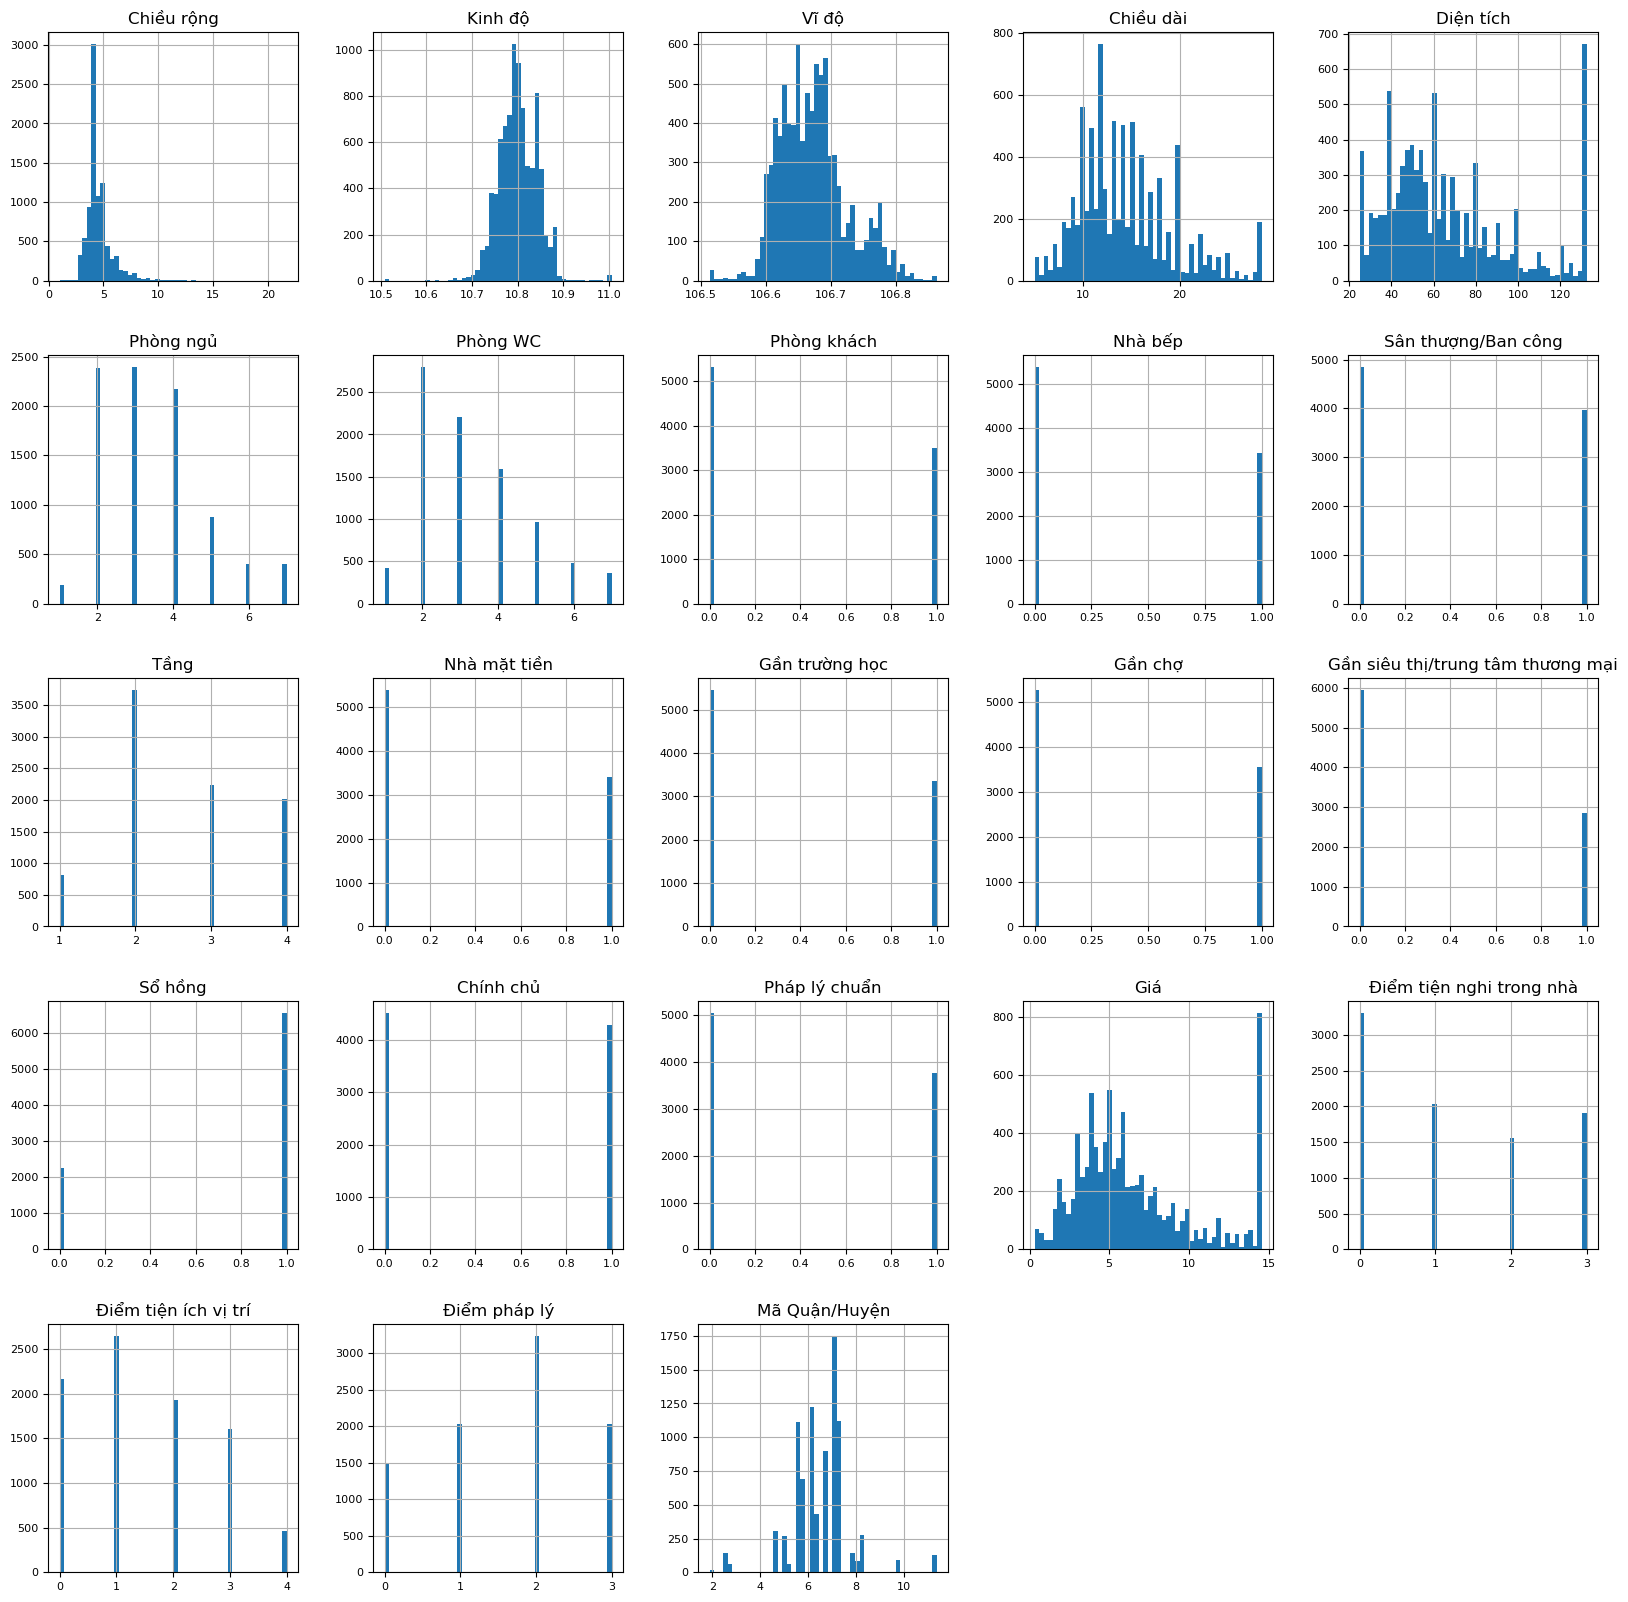

In [92]:
# Vẽ histogram cho các thuộc tính
df.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8, layout=(5, 5))

# Check lại thông tin data
df.info()

#### **11. Chuẩn hóa dữ liệu**

In [93]:
# Quyết định chuẩn hóa các thuộc tính có giá trị là liên tục và không phải là biến target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Tạo thêm hai cột 'Kinh độ chuẩn hóa' và 'Vĩ độ chuẩn hóa'
df['Kinh độ chuẩn hóa'] = df['Kinh độ']
df['Vĩ độ chuẩn hóa'] = df['Vĩ độ']

# Chọn ra các cột sẽ thực hiện chuẩn hóa
columns_to_scale = ['Chiều rộng', 'Chiều dài', 'Diện tích', 'Kinh độ chuẩn hóa', 'Vĩ độ chuẩn hóa']

# Thực hiện chuẩn hóa
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Xem lại thông tin sau khi chuẩn hóa
df[columns_to_scale].describe()


,Chiều rộng,Chiều dài,Diện tích,Kinh độ chuẩn hóa,Vĩ độ chuẩn hóa
count,8.809000e+03,8.809000e+03,8.809000e+03,8.809000e+03,8.809000e+03
mean,-2.823135e-17,-3.355498e-16,2.661813e-16,-1.200881e-14,3.678142e-16
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-2.756512e+00,-1.926463e+00,-1.391827e+00,-7.057220e+00,-3.035053e+00
25%,-4.362573e-01,-6.904390e-01,-7.138862e-01,-6.360962e-01,-7.331802e-01
50%,-3.073542e-01,-1.960293e-01,-2.054308e-01,-5.160717e-02,-8.293076e-02
75%,3.371609e-01,5.455852e-01,4.725097e-01,7.446337e-01,4.980855e-01
max,1.326973e+01,2.914632e+00,2.252104e+00,4.935715e+00,3.632697e+00


In [94]:
# Đưa cột giá xuống thành cột cuối
gia_replace = df['Giá'].copy()
df = df.drop(columns='Giá')
df['Giá'] = gia_replace

# Check lại thông tin data
df.info()
df.to_excel('Handled Data.xlsx',index=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ngày đăng                          8809 non-null   object 
 1   Chiều rộng                         8809 non-null   float64
 2   Quận/Huyện                         8809 non-null   object 
 3   Kinh độ                            8809 non-null   float64
 4   Vĩ độ                              8809 non-null   float64
 5   Chiều dài                          8809 non-null   float64
 6   Diện tích                          8809 non-null   float64
 7   Phòng ngủ                          8809 non-null   Int64  
 8   Phòng WC                           8809 non-null   Int64  
 9   Phòng khách                        8809 non-null   Int64  
 10  Nhà bếp                            8809 non-null   Int64  
 11  Sân thượng/Ban công                8809 non-null   Int64

#### **12. Nhận xét tương quan giữa các thuộc tính qua HeatMap**

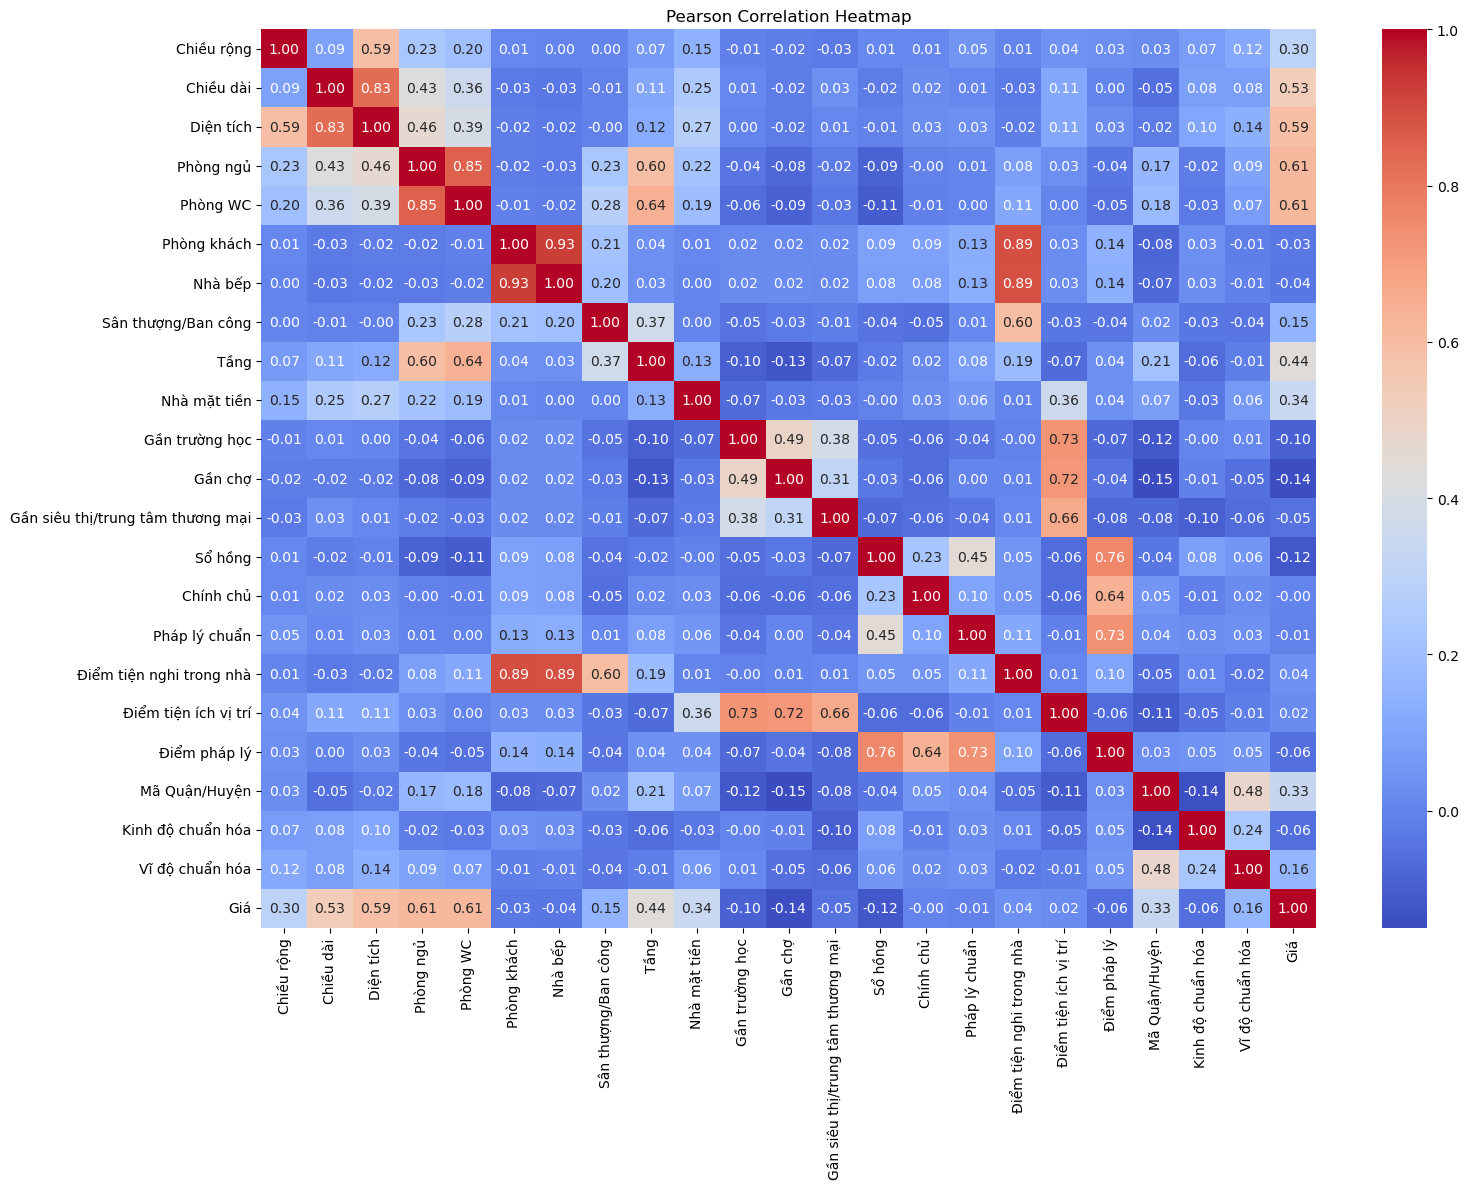

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo figure
plt.figure(figsize=(16, 12))  # Tạo figure trước khi vẽ heatmap

# Vẽ heatmap cho df
columns_to_drop = ['Ngày đăng', 'Quận/Huyện', 'Kinh độ', 'Vĩ độ']
sns.heatmap(df.drop(columns=columns_to_drop).corr(method='pearson'), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Pearson Correlation Heatmap')

# Điều chỉnh layout và hiển thị
plt.tight_layout()
plt.show()


- Mối tương quan của các biến với biến mục tiêu 'Giá':
    - Các biến có tương quan dương mạnh với 'Giá': Chiều dài, Diện tích, Phòng ngủ, Phòng WC
    - Các biến có tương quan dương trung bình với 'Giá': Chiều rộng, Tầng, Nhà mặt tiền, Mã Quận/Huyện
    - Các biến có tương quan dương yếu với 'Giá': Sân thượng/Ban công, Vĩ độ chuẩn hóa
    - Các biến có tương quan âm yếu với 'Giá': Gần trường học, Gần chợ, Sổ hồng

- Mối tương quan giữa các biến khác:
    - 'Diện tích' có tương quan cao với 'Chiều dài' và 'Chiều rộng'.
    - 'Phòng ngủ' có tương quan cao với 'Phòng WC'
    - 'Tầng' có tương quan cao với 'Phòng WC' và 'Phòng ngủ'
    - 'Nhà bếp' có tương quan cao với 'Phòng khách'
    - Ngoài ra các thuộc tính được kết hợp từ các thuộc tính khác thì chúng cũng có mối tương quan cao với nhau


- Kết luận:
    - Dựa trên kết quả phân tích, chúng ta nên tập trung vào các thuộc tính có mối tương quan cao với giá nhà như Chiều dài, Diện tích, Phòng ngủ, Phòng WC, Chiều rộng, Tầng, Nhà mặt tiền, Mã Quận/Huyện. Những thuộc tính này có ảnh hưởng lớn đến giá trị của bất động sản, và việc sử dụng chúng trong mô hình dự đoán giá sẽ mang lại kết quả chính xác hơn.

    - Ngược lại, các thuộc tính có mối tương quan thấp hoặc không rõ ràng với giá nhà có thể được giảm trọng số hoặc loại bỏ khỏi mô hình. Điều này giúp giảm độ phức tạp và tăng hiệu quả của mô hình, tránh tình trạng đa cộng tuyến và giảm số chiều dữ liệu.

    - Để đạt được điều này, phương pháp Phân Tích Thành Phần Chính (PCA) có thể được áp dụng. PCA giúp giảm số chiều của dữ liệu bằng cách giữ lại các thành phần chính có ảnh hưởng lớn nhất đến biến mục tiêu, đồng thời loại bỏ những thành phần ít quan trọng. Bằng cách này, chúng ta có thể tối ưu hóa mô hình dự đoán giá nhà, đảm bảo độ chính xác cao hơn và hiệu suất tốt hơn.

    - Ngoài ra, việc sử dụng PCA còn giúp giải quyết vấn đề đa cộng tuyến, một hiện tượng xảy ra khi các biến độc lập trong mô hình có mối quan hệ tuyến tính với nhau. Đa cộng tuyến có thể gây ra sự không ổn định trong ước lượng hệ số hồi quy và làm giảm độ chính xác của mô hình. Bằng cách giảm số chiều và loại bỏ các biến không cần thiết, PCA giúp giảm thiểu tác động của đa cộng tuyến, làm cho mô hình dự đoán trở nên đáng tin cậy hơn.